In [1]:
import pandas as pd
import  scipy
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pickle
from utils.data_loading import load_disruption_distance
from utils.data_loading import load_papers

In [2]:
from scipy.stats import ttest_ind
from statistics import mean, stdev
from math import sqrt

In [3]:
papers_df = load_papers('/gpfs/sciencegenome/AuthorDynamics/data/aps/preprocessed/paper_table.csv')
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category
0,0,10.1103/PhysRev.1.124,1913.0,1913-02-01,PR,An Absolute Determination of the Viscosity of Air,None,None,None,None,None,None
1,1,10.1103/PhysRev.1.16,1913.0,1913-01-01,PR,The Velocity of Electrons in the Photo-electri...,None,None,None,None,None,None
2,2,10.1103/PhysRev.1.218,1913.0,1913-03-01,PR,Brownian Movements in Gases at Low Pressures,None,None,None,None,None,None
3,3,10.1103/PhysRev.1.237,1913.0,1913-03-01,PR,Proceedings of the American Physical Society,None,None,None,None,None,None
4,4,10.1103/PhysRev.1.259,1913.0,1913-04-01,PR,The Annealing of Steel in an Alternating Magne...,None,None,None,None,None,None


In [4]:
#citation network
net = scipy.sparse.load_npz("/gpfs/sciencegenome/AuthorDynamics/data/aps/preprocessed/citation_net.npz")
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]
papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])
papers_df = papers_df[papers_df['citations']>4]
papers_df = papers_df[papers_df['references']>4]

In [5]:
NETWORKS_NAME = ['original']
MEASURE = ['150_5_q_1_ep_5_bs_4096_embedding/distance','150_5_q_1_ep_1_bs_16384_embedding/distance',
          '150_5_q_1_ep_1_bs_32768_embedding/distance','100_5_q_1_ep_1_bs_65536_embedding/distance',
           '100_5_q_1_ep_1_bs_16384_embedding/distance','100_5_q_1_ep_1_bs_32768_embedding/distance',
          '100_5_q_1_ep_1_bs_8192_embedding/distance','100_5_q_1_ep_5_bs_16384_embedding/distance']

for net in NETWORKS_NAME:
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m)

In [6]:
milestones = pd.read_excel('../data/APS_milestones.xlsx', sheet_name= "Sheet1",engine='openpyxl')

In [7]:
milestones['doi'] = milestones['doi'].apply(lambda x: x.replace('\n','')) 
milestones_doi_lst = [doi for doi in milestones['doi'] ]
milestones_doi_lst = set(milestones_doi_lst)

In [8]:
milestones_papers_df = papers_df[papers_df['doi'].apply(lambda x: x in milestones_doi_lst)]

In [9]:
milestones_papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,...,original_100_5_q_1_ep_1_bs_65536_embedding_distance,PCNT_RANK_original_100_5_q_1_ep_1_bs_65536_embedding_distance,original_100_5_q_1_ep_1_bs_16384_embedding_distance,PCNT_RANK_original_100_5_q_1_ep_1_bs_16384_embedding_distance,original_100_5_q_1_ep_1_bs_32768_embedding_distance,PCNT_RANK_original_100_5_q_1_ep_1_bs_32768_embedding_distance,original_100_5_q_1_ep_1_bs_8192_embedding_distance,PCNT_RANK_original_100_5_q_1_ep_1_bs_8192_embedding_distance,original_100_5_q_1_ep_5_bs_16384_embedding_distance,PCNT_RANK_original_100_5_q_1_ep_5_bs_16384_embedding_distance
1640,1640,10.1103/PhysRev.104.254,1956.0,1956-10-01,PR,Question of Parity Conservation in Weak Intera...,None,None,None,None,...,1.004693,0.983967,0.998986,0.985542,1.008625,0.988209,0.990016,0.981453,0.994831,0.979230
2917,2917,10.1103/PhysRev.108.1175,1957.0,1957-12-01,PR,Theory of Superconductivity,None,None,None,None,...,1.031485,0.991890,1.013642,0.990612,1.017087,0.990546,1.008447,0.989393,1.006503,0.986827
5766,5766,10.1103/PhysRev.117.159,1960.0,1960-01-01,PR,Detection of the Free Antineutrino,None,None,None,None,...,0.844479,0.371329,0.879335,0.658871,0.884926,0.687644,0.954718,0.948690,0.973938,0.954460
7344,7344,10.1103/PhysRev.122.345,1961.0,1961-04-01,PR,Dynamical Model of Elementary Particles Based ...,None,None,None,None,...,1.003108,0.983278,1.000840,0.986294,1.000740,0.985369,0.994414,0.983783,1.000497,0.983479
7971,7971,10.1103/PhysRev.124.246,1961.0,1961-10-01,PR,Dynamical Model of Elementary Particles Based ...,None,None,None,None,...,0.950149,0.932865,0.942984,0.929392,0.954159,0.944576,0.977913,0.973170,0.968487,0.946117


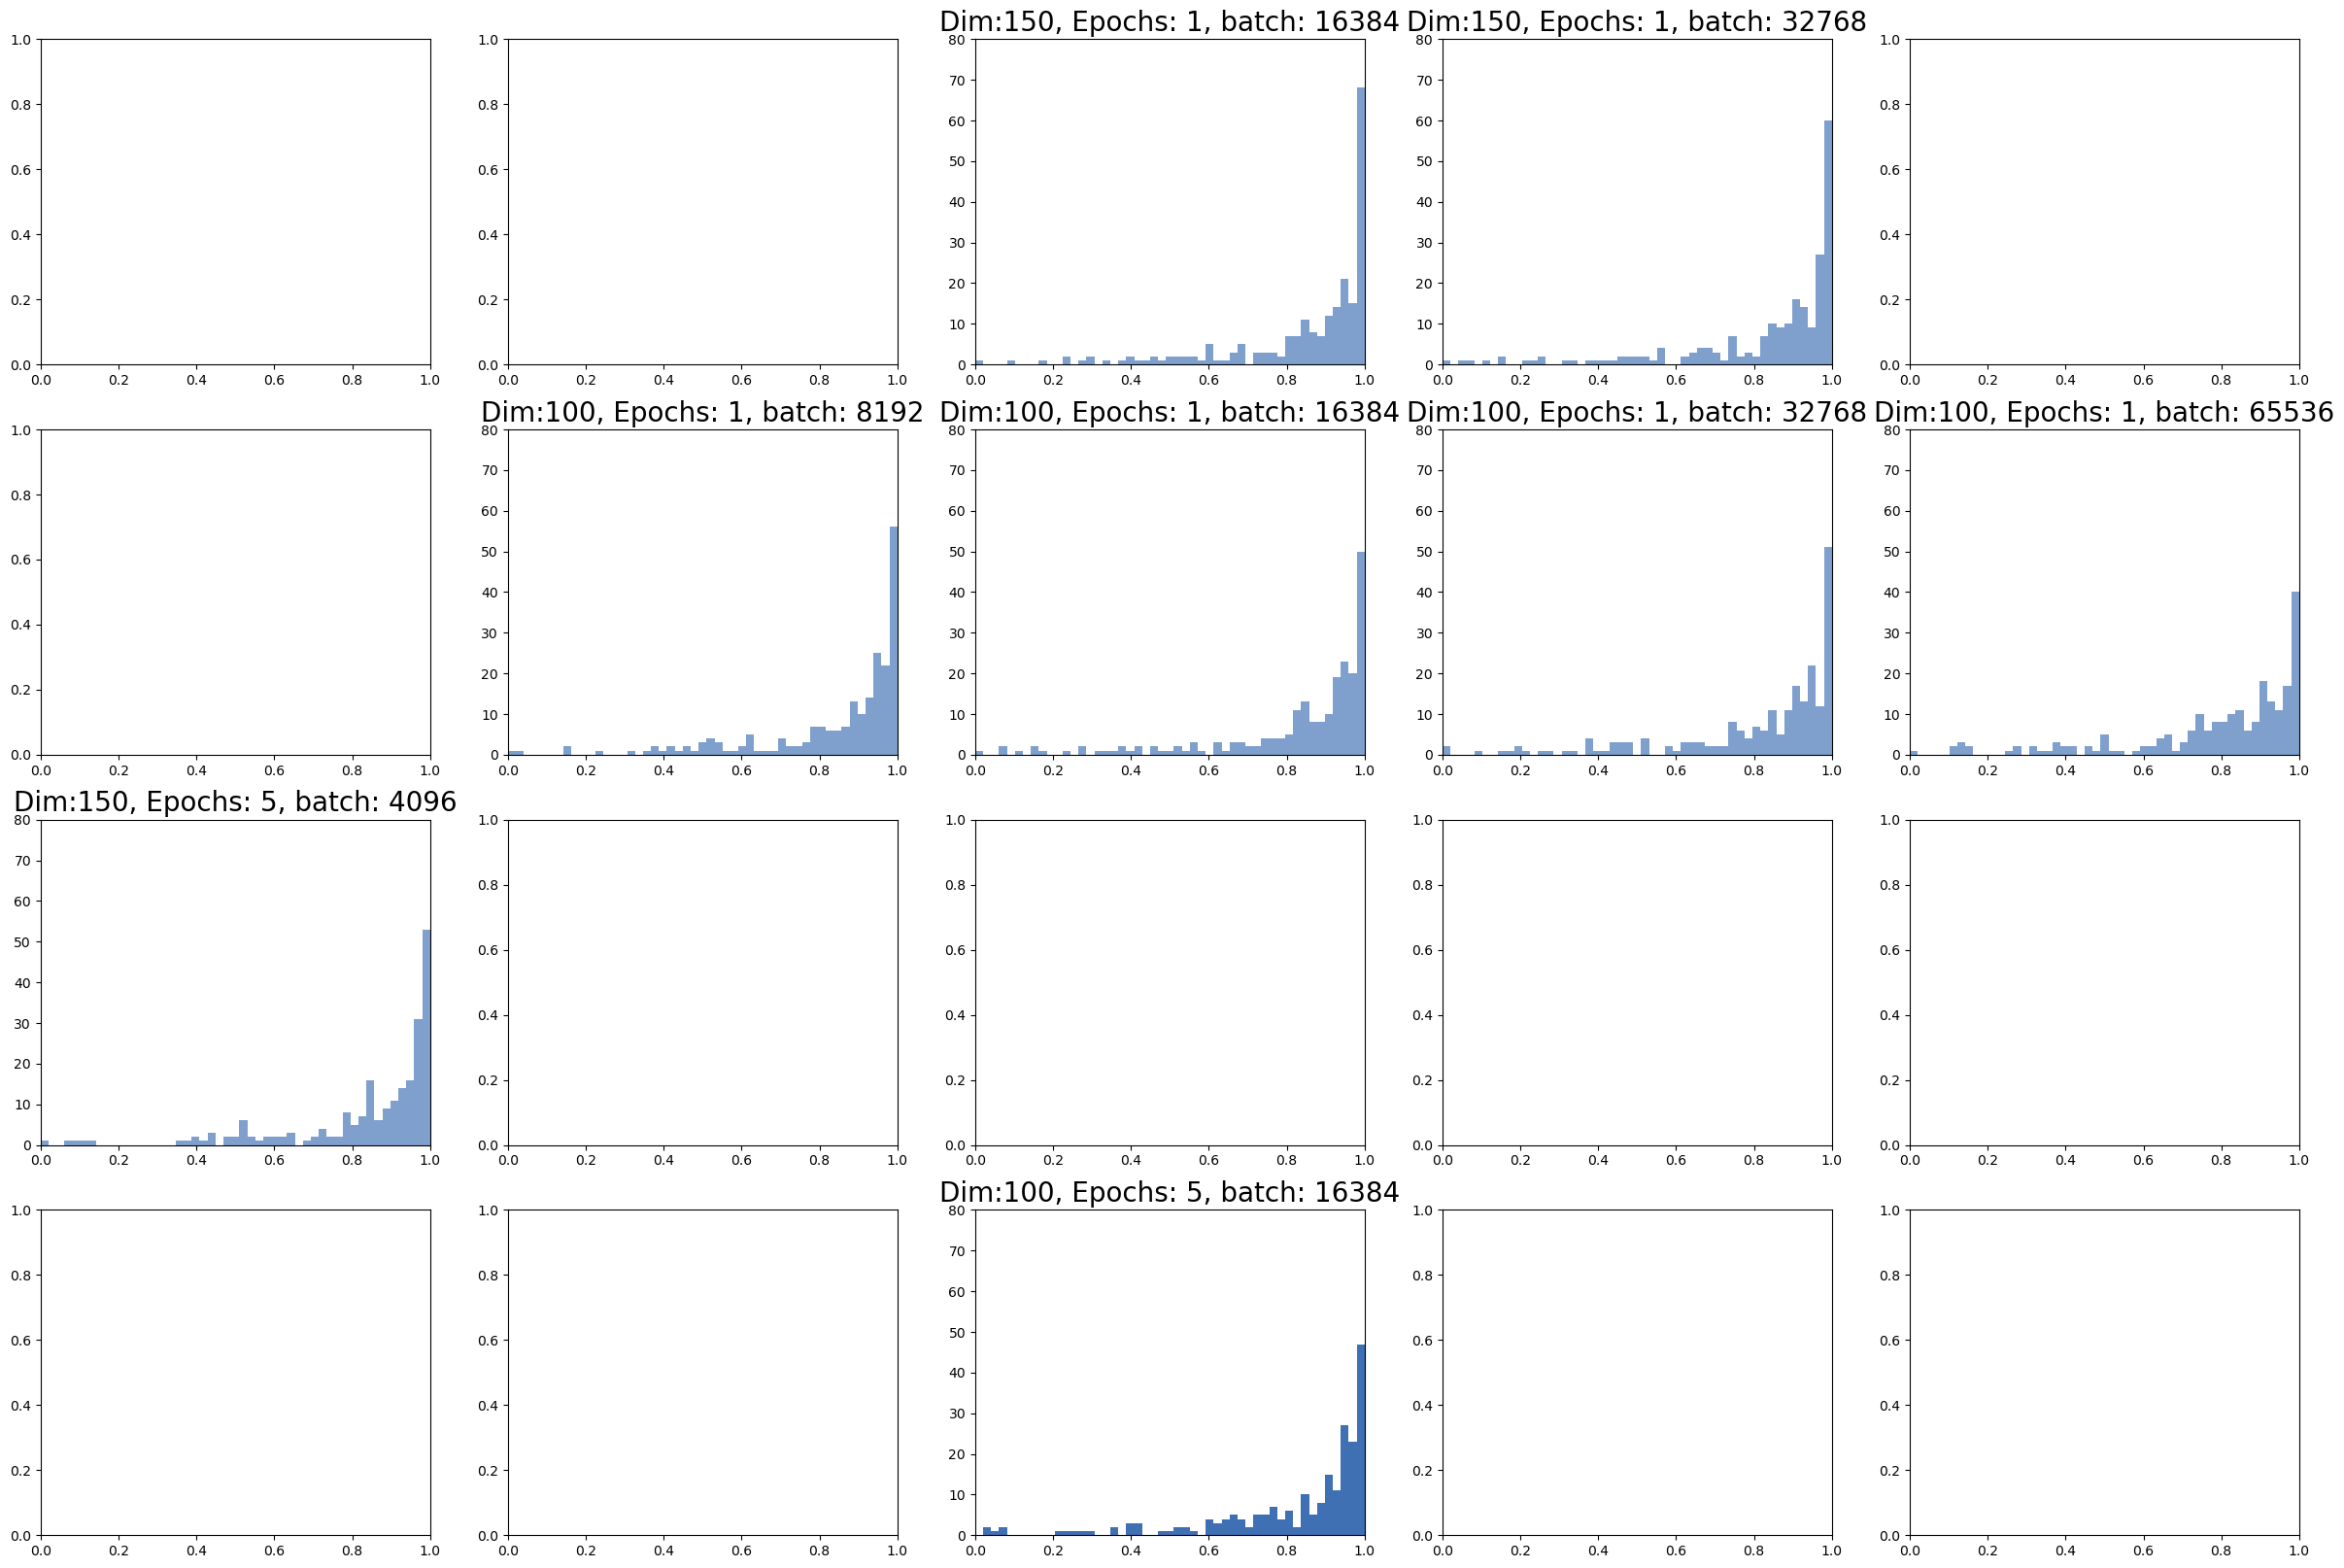

In [13]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(4, 5,figsize=(30,20))
bins = np.linspace(0, 1, 50)


# Access each subplot using indexing
axes[2, 0].hist(milestones_papers_df['PCNT_RANK_original_150_5_q_1_ep_5_bs_4096_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[2,0].set_title('Dim:150, Epochs: 5, batch: 4096',fontsize=20)
axes[2,0].set_xlim(0, 1)
axes[2,0].set_ylim(0, 80)

axes[0, 3].hist(milestones_papers_df['PCNT_RANK_original_150_5_q_1_ep_1_bs_32768_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[0,3].set_title('Dim:150, Epochs: 1, batch: 32768',fontsize=20)
axes[0,3].set_xlim(0, 1)
axes[0,3].set_ylim(0, 80)

axes[0, 2].hist(milestones_papers_df['PCNT_RANK_original_150_5_q_1_ep_1_bs_16384_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[0,2].set_title('Dim:150, Epochs: 1, batch: 16384',fontsize=20)
axes[0,2].set_xlim(0, 1)
axes[0,2].set_ylim(0, 80)

axes[1, 2].hist(milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_16384_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[1,2].set_title('Dim:100, Epochs: 1, batch: 16384',fontsize=20)
axes[1,2].set_xlim(0, 1)
axes[1,2].set_ylim(0, 80)

axes[1, 3].hist(milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_32768_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[1,3].set_title('Dim:100, Epochs: 1, batch: 32768',fontsize=20)
axes[1,3].set_xlim(0, 1)
axes[1,3].set_ylim(0, 80)

axes[1, 4].hist(milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_65536_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[1,4].set_title('Dim:100, Epochs: 1, batch: 65536',fontsize=20)
axes[1,4].set_xlim(0, 1)
axes[1,4].set_ylim(0, 80)


axes[3, 2].hist(milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_5_bs_16384_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[3,2].set_title('Dim:100, Epochs: 5, batch: 65536',fontsize=20)
axes[3,2].set_xlim(0, 1)
axes[3,2].set_ylim(0, 80)


axes[1, 1].hist(milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_1_bs_8192_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[1,1].set_title('Dim:100, Epochs: 1, batch: 8192',fontsize=20)
axes[1,1].set_xlim(0 ,1)
axes[1,1].set_ylim(0, 80)

axes[3, 2].hist(milestones_papers_df['PCNT_RANK_original_100_5_q_1_ep_5_bs_16384_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
axes[3,2].set_title('Dim:100, Epochs: 5, batch: 16384',fontsize=20)
axes[3,2].set_xlim(0, 1)
axes[3,2].set_ylim(0, 80)

# axes[2, 0].hist(milestones_papers_df['PCNT_RANK_original_n2v_None_150_5_q_1_ep_2_bs_4096_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
# axes[2,0].set_title('Dim:150, Epochs: 2, batch: 4096',fontsize=20)
# axes[2,0].set_xlim(0, 1)
# axes[2,0].set_ylim(0, 80)


# axes[2, 1].hist(milestones_papers_df['PCNT_RANK_original_n2v_None_150_5_q_1_ep_2_bs_1024_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
# axes[2,1].set_title('Dim:150, Epochs: 2, batch: 1024',fontsize=20)
# axes[2,1].set_xlim(0 ,1)
# axes[2,1].set_ylim(0, 80)

# axes[3, 1].hist(milestones_papers_df['PCNT_RANK_original_n2v_None_150_5_q_1_ep_3_bs_1024_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
# axes[3,1].set_title('Dim:150, Epochs: 3, batch: 1024',fontsize=20)
# axes[3,1].set_xlim(0 ,1)
# axes[3,1].set_ylim(0, 80)

# axes[4, 0].hist(milestones_papers_df['PCNT_RANK_original_n2v_None_100_5_q_1_ep_1_bs_4096_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
# axes[4,0].set_title('Dim:100, Epochs: 1, batch: 4096',fontsize=20)
# axes[4,0].set_xlim(0 ,1)
# axes[4,0].set_ylim(0, 80)


# axes[4, 1].hist(milestones_papers_df['PCNT_RANK_original_n2v_None_100_5_q_1_ep_1_bs_1024_embedding_distance'],bins=bins,color = '#00429d',alpha=0.5)
# axes[4,1].set_title('Dim:100, Epochs: 1, batch: 1024',fontsize=20)
# axes[4,1].set_xlim(0 ,1)
# axes[4,1].set_ylim(0, 80)


fig.show()
